# kNN on IRIS Dataset

In [4]:
import numpy as np
import math
from sklearn import preprocessing
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection  import train_test_split

In [28]:
iris = pd.read_csv(r'iris.csv', names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

In [29]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## (1a) Feature distribution for each iris class

In [32]:
iris_setosa = iris.loc[iris['class'] == 'Iris-setosa']

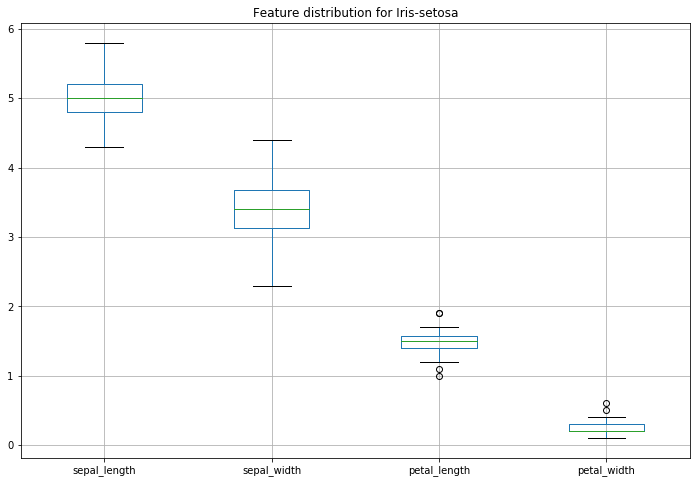

In [34]:
plt.figure(figsize = (12,8))
iris_setosa.boxplot()
plt.title('Feature distribution for Iris-setosa')
plt.show()

In [35]:
iris_virginica = iris.loc[iris['class'] == 'Iris-virginica']

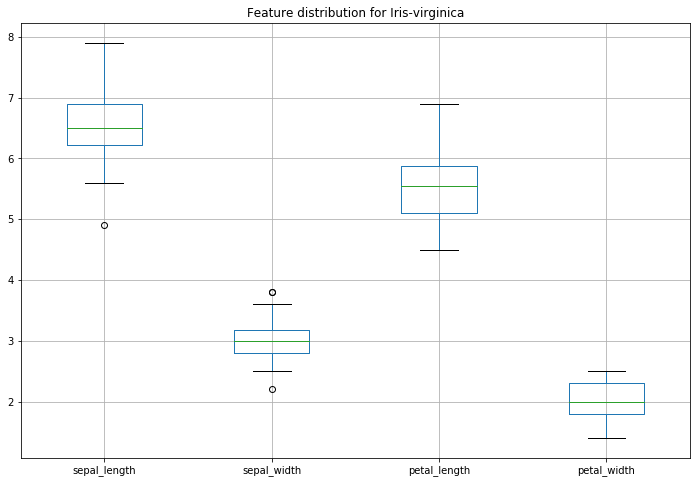

In [36]:
plt.figure(figsize = (12,8))
iris_virginica.boxplot()
plt.title('Feature distribution for Iris-virginica')
plt.show()

In [37]:
iris_versicolor = iris.loc[iris['class'] == 'Iris-versicolor']

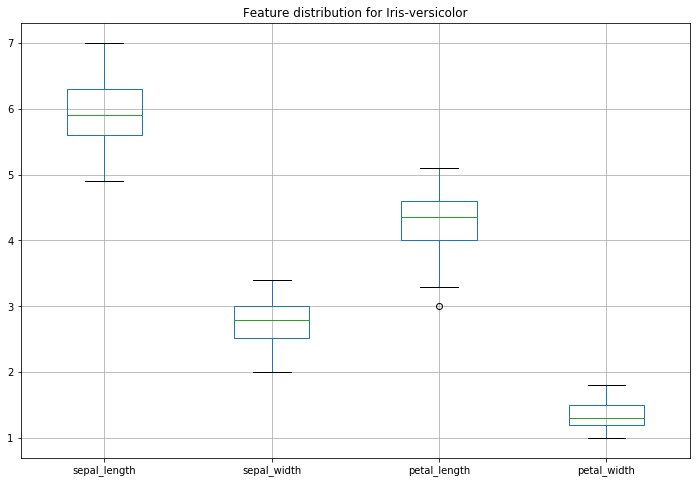

In [38]:
plt.figure(figsize = (12,8))
iris_versicolor.boxplot()
plt.title('Feature distribution for Iris-versicolor')
plt.show()

### Encoding class labels

In [4]:
le = preprocessing.LabelEncoder()
iris['class'] = le.fit_transform(iris['class'])

In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
features = iris.iloc[:, :-1].values
labels = iris.iloc[:, 4].values

In [21]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, stratify = labels)

In [22]:
y_test[0]

2

In [9]:
def euclidean_distance(d1, d2):
    distance = 0.0
    for i in range(0, len(d1)):
        distance += (abs(d1[i] - d2[i]))**2
    return math.sqrt(distance)

In [10]:
def kNN(k, X_train, y_train, test_instance, distance_measure):
    
    distances = []
    
    # Computing all distamces from a test instance     
    
    for i in range(0, len(X_train)):
        d = distance_measure(test_instance, X_train[i])
        distances.append([d, X_train[i], y_train[i]])

    distances.sort(key = lambda x : x[0])
    k_nearest_neighbors = distances[:k]  # getting k nearest neighbors
    
    # Getting class with majority voting     
    class_counts = {}
    for i in range(0, k):
        closest_label = k_nearest_neighbors[i][2]
        if closest_label in class_counts:
            class_counts[closest_label] += 1
        else:
            class_counts[closest_label] = 1
            
    classCounts = list(class_counts.values())
    classes = list(class_counts.keys())
    y_pred = classes[classCounts.index(max(classCounts))]
    
    return (k_nearest_neighbors, y_pred)

In [11]:
neighbors, pred_label = kNN(5, X_train, y_train, X_test[0], euclidean_distance)
# print(neighbors)
print(pred_label)

2


In [12]:
from matplotlib.colors import ListedColormap
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

def plot_decision_boundary(k, distance_measure):
    X = iris.iloc[:, :2].values
    y = iris.iloc[:, 4].values
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    dataItems = np.c_[xx.ravel(), yy.ravel()]

    y_preds = []

    for item in dataItems:
        neighbors, pred_label = kNN(k, features, y, item, distance_measure)
        y_preds.append(pred_label)
#     print(y_preds)
    y_preds = np.asarray(y_preds)
    y_preds = y_preds.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, y_preds, cmap=cmap_light)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Decision boundary for k-value = {0}".format(k))

    plt.show()

## (1b)(1c) Decision boundary for different values of k with euclidean distance

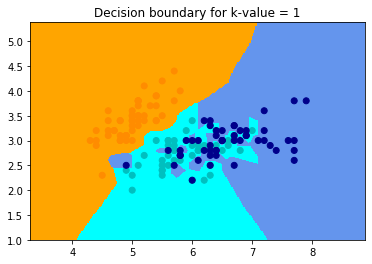

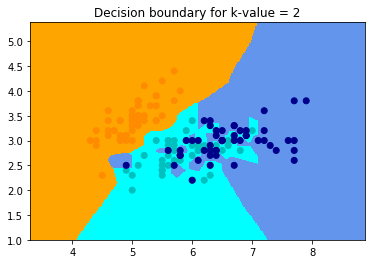

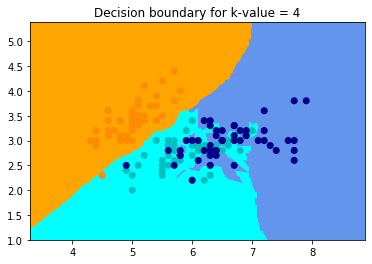

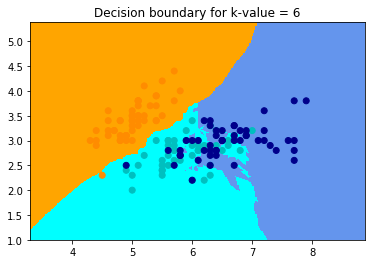

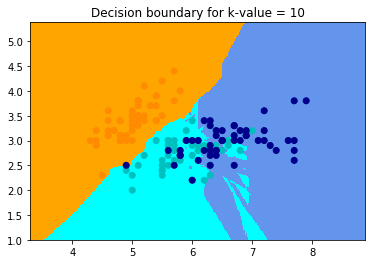

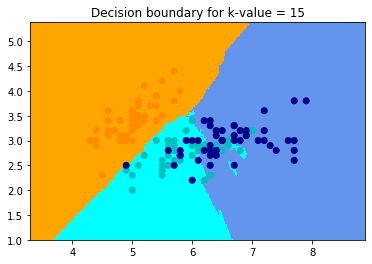

In [25]:
k_list = [1, 2, 4, 6, 10, 15]

for k in k_list:
    plot_decision_boundary(k, euclidean_distance)

### Change in decision boundary with k
The decision boundary in kNN depends on k-value and becomes over-granulated as k decreases. Decision boundary becomes smooth as k increases. As we can see from above, decision boundary is smooth for k=6, 10, 15 making the decision easier to understand.

## (1e) Accuracy with euclidean distance

In [13]:
def accuracy(y_pred, y_test):
    tp = 0
    for i in range(0, len(y_pred)):
        if(y_pred[i] == y_test[i]):
            tp += 1
    
    accuracy = (tp / len(y_pred))
    return accuracy

For k = 1, Accuracy 0.9333333333333333 %
For k = 2, Accuracy 0.9333333333333333 %
For k = 4, Accuracy 0.9666666666666667 %
For k = 6, Accuracy 0.9666666666666667 %
For k = 10, Accuracy 0.9666666666666667 %
For k = 15, Accuracy 1.0 %


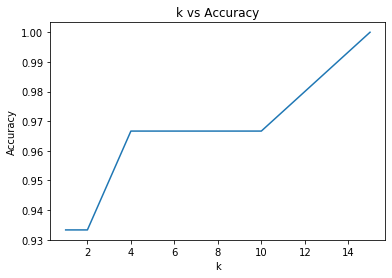

In [23]:
accuracy_list = []
k_list = [1, 2,4,6,10,15]

for k in k_list:
    y_pred = []
    for test_instance in X_test:
        neighbors, pred_label = kNN(k, X_train, y_train, test_instance, euclidean_distance)
        y_pred.append(pred_label)
    acc = accuracy(y_pred, y_test)
    print("For k = {}, Accuracy {} %".format(k,acc))
    
    accuracy_list.append(acc)
plt.plot(k_list, accuracy_list)  

plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('k vs Accuracy')

plt.show()

## (1d) Decision boundary for different values of k with Minkowski distance

In [15]:
def minkowski_distance(d1, d2):
    distance = 0.0
    for i in range(0, len(d1)):
        distance += (abs(d1[i] - d2[i]))**3
    return math.pow(distance, 1/3)

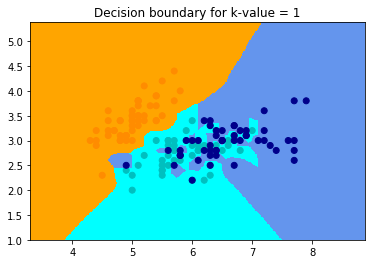

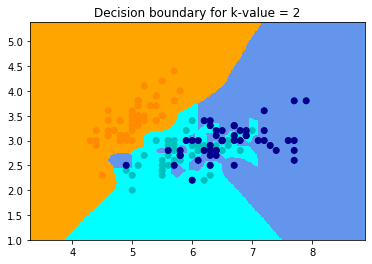

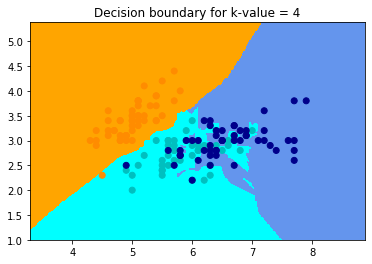

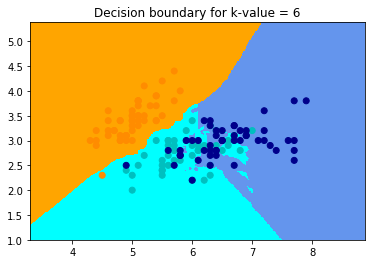

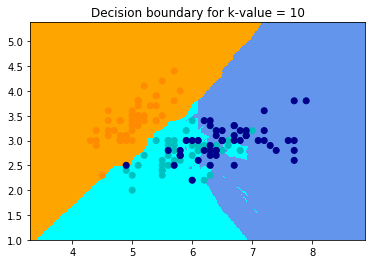

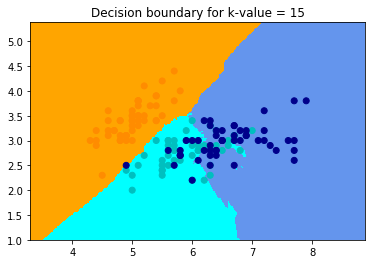

In [26]:
k_list = [1, 2, 4, 6, 10, 15]

for k in k_list:
    plot_decision_boundary(k, minkowski_distance)

## (1e) Accuracy with minkowski distance

For k = 1, Accuracy 0.9333333333333333 %
For k = 2, Accuracy 0.9333333333333333 %
For k = 4, Accuracy 0.9666666666666667 %
For k = 6, Accuracy 0.9666666666666667 %
For k = 10, Accuracy 1.0 %
For k = 15, Accuracy 1.0 %


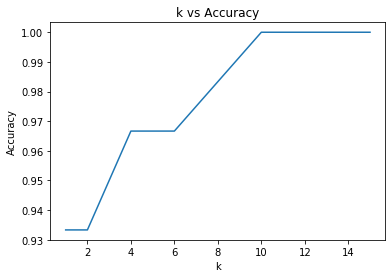

In [24]:
accuracy_list = []
k_list = [1, 2,4,6,10,15]

for k in k_list:
    y_pred = []
    for test_instance in X_test:
        neighbors, pred_label = kNN(k, X_train, y_train, test_instance, minkowski_distance)
        y_pred.append(pred_label)
    acc = accuracy(y_pred, y_test)
    print("For k = {}, Accuracy {} %".format(k,acc))
    
    accuracy_list.append(acc)
plt.plot(k_list, accuracy_list)  

plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('k vs Accuracy')

plt.show()

### Effect of distance measure on classification
The decision boundaries for k=1,2,4 are almost similar for both euclidean and minowski measures. But for larger values of k like 6,10,15 minowski gave more stable boundaries comparitively and is less effected by noise.

# kNN on MNIST Dataset

In [5]:
from scipy.spatial.distance import cdist
from scipy import stats

In [6]:
mnist_train = pd.read_csv(r'mnist_train.csv', names = [i for i in range(785)])
mnist_test = pd.read_csv(r'mnist_test.csv', names = [i for i in range(785)])

In [7]:
mnist_train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
X_train, y_train = mnist_train[[i for i in range(1,785)]].values, mnist_train[[0]].values
X_test, y_test = mnist_test[[i for i in range(1,785)]].values, mnist_test[[0]].values
# X_train, y_train, X_test, y_test = X_train.values,y_train.values,X_test.values,y_test.values

In [43]:
train_examples = [500, 1000, 2500, 5000, 10000, 30000, 60000]
test_pred = []

In [44]:
def kNN(X_test, X_train, y_train, k):
    n_samples = X_test.shape[0]
    y_pred = np.empty(n_samples, dtype = np.float64)
    
    for i in range(n_samples):
        # extracting test instance value
        test_instance = X_test[[i],:]
        distance = cdist(X_train, test_instance)
            
        # sorting distances and getting sorted index
        sorted_index = np.argsort(distance, axis = 0)
        
        # extracting most frequent class in k neighbors
        pred = stats.mode(y_train[sorted_index[0:k]])
        y_pred[i] = pred[0]
    return y_pred

In [45]:
for i in train_examples:
    test_pred.append(kNN(X_test[:1000], X_train[:i], y_train[:i], 2))

In [19]:
def error(y_pred, y_test):
    error_count = 0
    for i in range(0, len(y_pred)):
        if(y_pred[i] != y_test[i]):
            error_count += 1
    
    error_rate = (error_count / len(y_pred))
    return error_rate

In [48]:
error_list = []
for i, values in enumerate(train_examples):
    error_list.append(error(test_pred[i], y_test[:1000]))
error_list

[0.226, 0.183, 0.13, 0.105, 0.093, 0.058, 0.052]

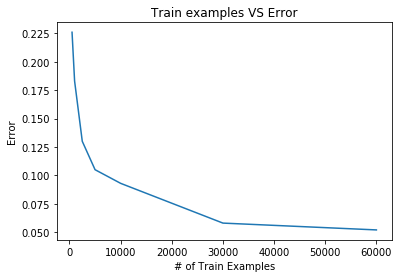

In [49]:
plt.figure()
plt.xlabel('# of Train Examples')
plt.ylabel('Error')
plt.plot(train_examples, error_list)
# plt.ylim([0,1])
plt.title('Train examples VS Error')
plt.show()
plt.close()

## (2b) Confusion Matrix for best set (when train examples=60000)

In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test[:1000], test_pred[6])

array([[ 85,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 126,   0,   0,   0,   0,   0,   0,   0,   0],
       [  3,   1, 108,   0,   1,   0,   0,   3,   0,   0],
       [  0,   0,   1, 101,   0,   3,   0,   2,   0,   0],
       [  1,   1,   0,   0, 105,   0,   0,   0,   0,   3],
       [  0,   0,   0,   3,   1,  83,   0,   0,   0,   0],
       [  2,   0,   0,   0,   1,   0,  84,   0,   0,   0],
       [  0,   2,   0,   2,   1,   0,   0,  94,   0,   0],
       [  2,   0,   2,   5,   2,   2,   1,   0,  74,   1],
       [  0,   0,   0,   1,   2,   0,   0,   2,   1,  88]])

## (2c) Other method using half of the training examples with examples weighted according to distance

In [9]:
from sklearn.neighbors import KNeighborsClassifier
# X_train = X_train[:30000]
model = KNeighborsClassifier(n_neighbors = 2, metric = 'euclidean', weights = 'distance')
model.fit(X_train[:30000], y_train[:30000])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='distance')

In [10]:
y_pred = model.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score
error_rate = 1 - accuracy_score(y_pred, y_test)
error_rate

0.03820000000000001

#### As seen from the results above the error rate has reduced by 0.02 when compared to uniform distance method

### Using median class instead of mode (class with majority votes)

In [16]:
def kNN_median(X_test, X_train, y_train, k):
    n_samples = X_test.shape[0]
    y_pred = np.empty(n_samples, dtype = np.float64)
    
    for i in range(n_samples):
        # extracting test instance value
        test_instance = X_test[[i],:]
        distance = cdist(X_train, test_instance)
            
        # sorting distances and getting sorted index
        sorted_index = np.argsort(distance, axis = 0)
        
        # extracting most frequent class in k neighbors
        pred = np.median(y_train[sorted_index[0:k]])
        y_pred[i] = pred
    return y_pred

In [17]:
train_examples = [30000]
test_pred = []
for i in train_examples:
    test_pred.append(kNN_median(X_test[:1000], X_train[:i], y_train[:i], 2))

In [20]:
error_list = []
for i, values in enumerate(train_examples):
    error_list.append(error(test_pred[i], y_test[:1000]))
error_list

[0.094]

### As seen from above, error rate is higher when median class is used instead of mode (class with majority votes)